In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

data=pd.read_csv('ACData.csv')
data=data[['ServiceName','StartTime','Gender','DisablingConditions','AgeGroup','Geog']]
data['StartTime']=pd.to_datetime(data['StartTime'],format='%Y/%m/%d %H:%M')
data['hour']=data['StartTime'].apply(lambda x: x.strftime('%H'))
data['month']=data['StartTime'].apply(lambda x: x.strftime('%m'))
data.head()

,ServiceName,StartTime,Gender,DisablingConditions,AgeGroup,Geog,hour,month
0,Pull Cord Alarm,2018-10-29 00:15:00,F,Epilepsy,70~79,East,00,10
1,Alarm,2018-10-29 00:44:00,M,Multiple Sclerosis,50~59,East,00,10
2,Alarm,2018-10-29 00:44:00,M,Multiple Sclerosis,50~59,East,00,10
3,Alarm,2018-10-29 00:44:00,M,Multiple Sclerosis,50~59,East,00,10
4,Alarm,2018-10-29 00:44:00,M,Multiple Sclerosis,50~59,East,00,10


In [2]:
data=data.replace('Alarm','General Alarm')
data=data.loc[data['ServiceName']!='Helenvale Alarm']
data.DisablingConditions.value_counts()

Cerebral Palsy                                                                                                                                                                                                                                                                                2756
Physical Injury                                                                                                                                                                                                                                                                               2046
Multiple Sclerosis                                                                                                                                                                                                                                                                            1720
Brain Injury                                                                                                                   

In [3]:
data=data.replace(['Physical Injury','COPD','Spina Bifida','Spinal Injury','Arthritis','Asthma','Visual Impairment','Cancer','Amputee',
                   'Spina Bifida                                      ,Spina Bifida',
                  'Elderly Care/Support','Diabetes','Stroke','Lifelong Mobility Issues'],'Physically Affected')
data=data.replace(['Epilepsy','Mental Health Issues','Learning Difficulties',
                  'Epilepsy                                          ,Epilepsy',
                  'OCD','Bi Polar Disorder'],'Mentally Affected')
data=data.replace(['Cerebral Palsy','Multiple Sclerosis','Brain Injury',"Huntington's",
                   "Huntingtons                                       ,Huntington's, Prone to Falls                                    ,Huntington's",
                  "Incontinence                                      ,Cerebral Palsy, Poor mobility                                     ,Cerebral Palsy",
                  'Parkinsons',
                   "Arthitis                                          ,Cerebral Palsy, Blind                                             ,Cerebral Palsy, Hearing Impairment                                ,Cerebral Palsy",
                  "Incontinence                                      ,Multiple Sclerosis, Multiple Sclerosis                                ,Multiple Sclerosis, Poor mobility                                     ,Multiple Sclerosis, Skin Issues                                       ,Multiple Sclerosis",
                  'Stroke                                            ,Brain Injury',
                  'Parkinsons                                        ,Parkinsons',
                  'Cerebal Palsy                                     ,Cerebral Palsy'],'Physically and Mentally Affected')


In [4]:
data=data.replace(['30~39','40~49','50~59'],'30-59')
data=data.replace(['60~69','70~79','80~89','>90'],'>60')

In [5]:
data.head()

,ServiceName,StartTime,Gender,DisablingConditions,AgeGroup,Geog,hour,month
0,Pull Cord Alarm,2018-10-29 00:15:00,F,Mentally Affected,>60,East,00,10
1,General Alarm,2018-10-29 00:44:00,M,Physically and Mentally Affected,30-59,East,00,10
2,General Alarm,2018-10-29 00:44:00,M,Physically and Mentally Affected,30-59,East,00,10
3,General Alarm,2018-10-29 00:44:00,M,Physically and Mentally Affected,30-59,East,00,10
4,General Alarm,2018-10-29 00:44:00,M,Physically and Mentally Affected,30-59,East,00,10


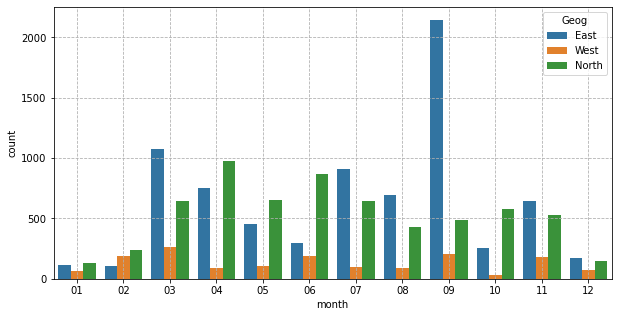

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',hue='Geog',data=data)
plt.grid(ls = '--')

In [7]:
data_East=data.loc[data['Geog']=='East']
data_East.to_csv('data_East')

In [8]:
data_East=data_East.drop(columns=['Geog','StartTime'])
data_East.head()

,ServiceName,Gender,DisablingConditions,AgeGroup,hour,month
0,Pull Cord Alarm,F,Mentally Affected,>60,00,10
1,General Alarm,M,Physically and Mentally Affected,30-59,00,10
2,General Alarm,M,Physically and Mentally Affected,30-59,00,10
3,General Alarm,M,Physically and Mentally Affected,30-59,00,10
4,General Alarm,M,Physically and Mentally Affected,30-59,00,10


In [9]:
data_East_Gender=data_East.groupby(['month','hour','Gender'],as_index=False).count()
data_East_Gender['Counting']=data_East_Gender['ServiceName']
data_East_Gender=data_East_Gender.drop(columns=['ServiceName','DisablingConditions','AgeGroup'])
data_East_Gender.to_csv('data_East_Gender')

data_East_ServiceName=data_East.groupby(['month','hour','ServiceName'],as_index=False).count()
data_East_ServiceName['Counting']=data_East_ServiceName['Gender']
data_East_ServiceName=data_East_ServiceName.drop(columns=['Gender','DisablingConditions','AgeGroup'])
data_East_ServiceName.to_csv('data_East_ServiceName')

data_East_DisablingConditions=data_East.groupby(['month','hour','DisablingConditions'],as_index=False).count()
data_East_DisablingConditions['Counting']=data_East_DisablingConditions['Gender']
data_East_DisablingConditions=data_East_DisablingConditions.drop(columns=['Gender','ServiceName','AgeGroup'])
data_East_DisablingConditions.to_csv('data_East_DisablingConditions')

data_East_AgeGroup=data_East.groupby(['month','hour','AgeGroup'],as_index=False).count()
data_East_AgeGroup['Counting']=data_East_AgeGroup['Gender']
data_East_AgeGroup=data_East_AgeGroup.drop(columns=['Gender','ServiceName','DisablingConditions'])
data_East_AgeGroup.to_csv('data_East_AgeGroup')